In [1]:
import wang

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time
from datetime import datetime
import pickle

b2.defaultclock.dt = 0.10 * b2.ms



In [3]:
def pop_rate_to_dict(results):
    
    # population firing rate smoothed by 20ms 

    pop_rate_a = results["rate_monitor_A"]
    pop_rate_b = results["rate_monitor_B"]
    
    smooth_pop_rate_a = pop_rate_a.smooth_rate(window="flat",width = 20.1*b2.ms )
    smooth_pop_rate_b = pop_rate_b.smooth_rate(window="flat",width = 20.1*b2.ms )

    np_rate_a = np.array(smooth_pop_rate_a)
    np_rate_b = np.array(smooth_pop_rate_b)

    time = pop_rate_a.t/b2.ms
    pop_rate_results = {}

    pop_rate_results['time'] =  time
    pop_rate_results['pop_rate_a'] =  np_rate_a
    pop_rate_results['pop_rate_b'] =  np_rate_b
    
    return pop_rate_results


In [4]:
pop_rate_list = []


In [9]:
def network_sim(w_pos_value, s_durantion, end_time):
    
    # s_duration is the during which 
    
    stim_duration = s_durantion* b2.ms
    end_sim = end_time* b2.ms
    stim_start = 100 * b2.ms


    results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                    t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                    coherence_level=+0.90, w_pos=w_pos_value, mu0_mean_stimulus_Hz=500 * b2.Hz,
                                    max_sim_time=end_sim)




    plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                sup_title="Left")
    plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                sup_title="Right")
    plt.show() 
    
    return results

simulating 426 neurons. Start: Mon Sep 19 17:31:19 2022


INFO       width adjusted from 2. ms to 2.1 ms [brian2.monitors.ratemonitor.adjusted_width]


sim end: Mon Sep 19 17:36:37 2022


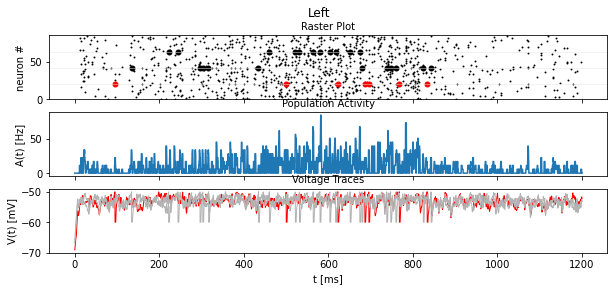

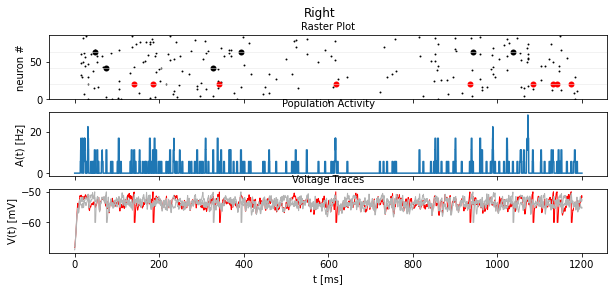

simulating 426 neurons. Start: Mon Sep 19 17:36:39 2022
sim end: Mon Sep 19 17:40:21 2022


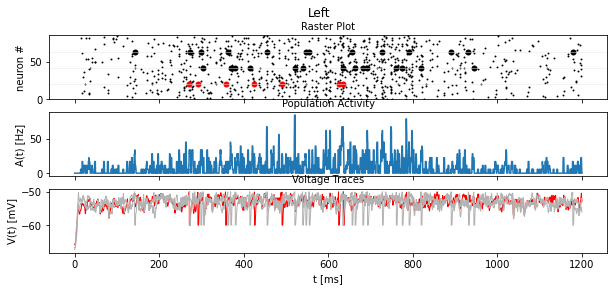

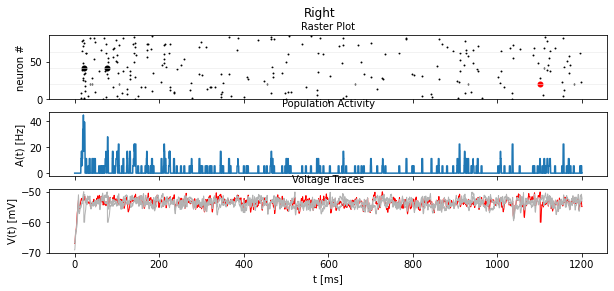

simulating 426 neurons. Start: Mon Sep 19 17:40:23 2022
sim end: Mon Sep 19 17:41:30 2022


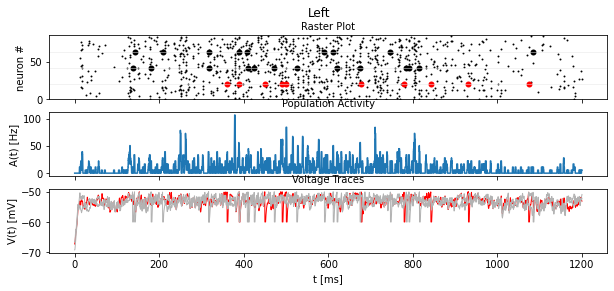

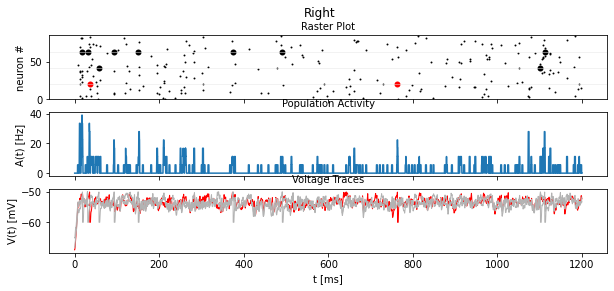

simulating 426 neurons. Start: Mon Sep 19 17:41:32 2022
sim end: Mon Sep 19 17:42:38 2022


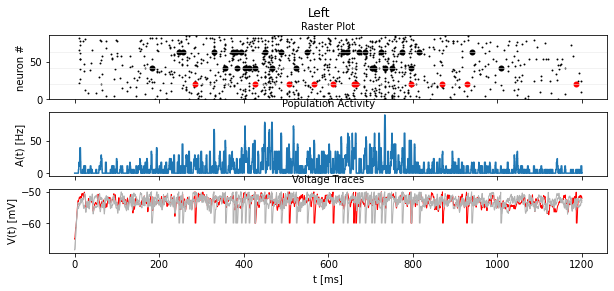

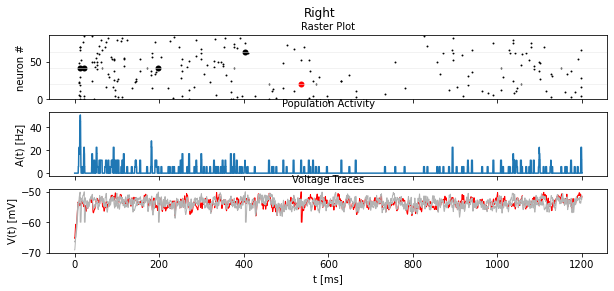

simulating 426 neurons. Start: Mon Sep 19 17:42:40 2022
sim end: Mon Sep 19 17:43:47 2022


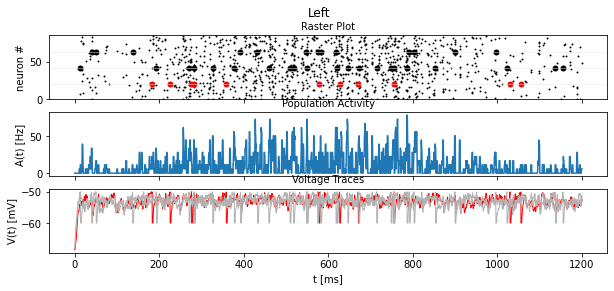

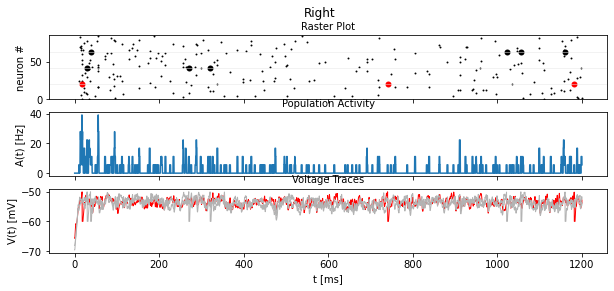

simulating 426 neurons. Start: Mon Sep 19 17:43:49 2022
sim end: Mon Sep 19 17:44:56 2022


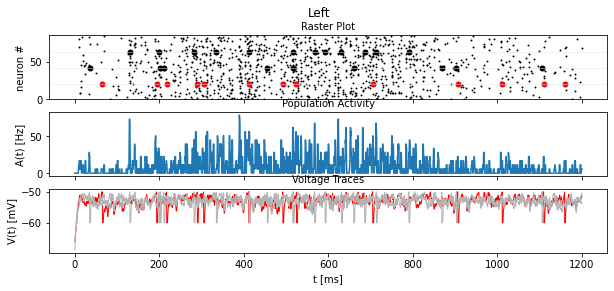

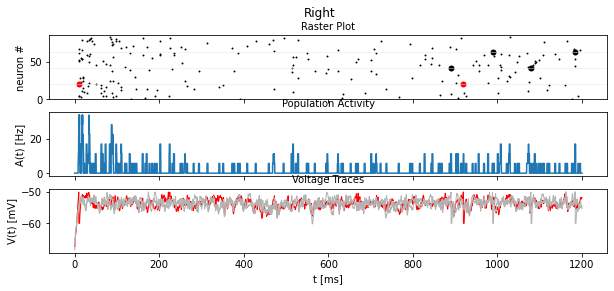

simulating 426 neurons. Start: Mon Sep 19 17:44:58 2022
sim end: Mon Sep 19 17:46:06 2022


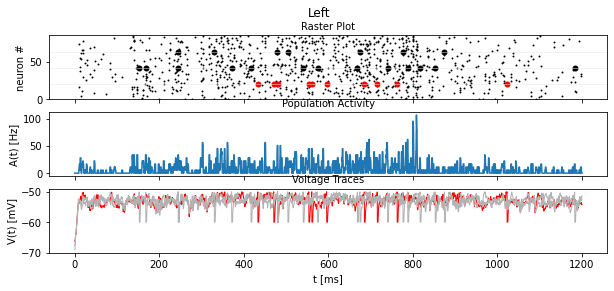

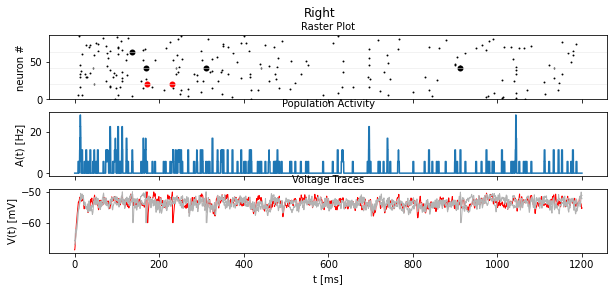

simulating 426 neurons. Start: Mon Sep 19 17:46:07 2022
sim end: Mon Sep 19 17:47:14 2022


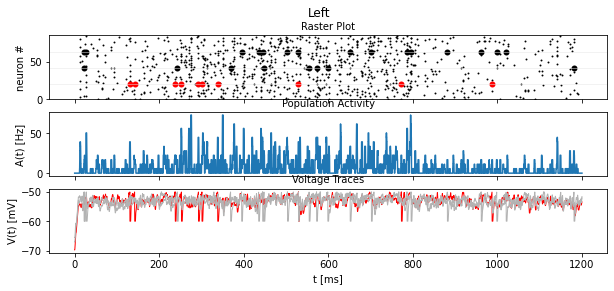

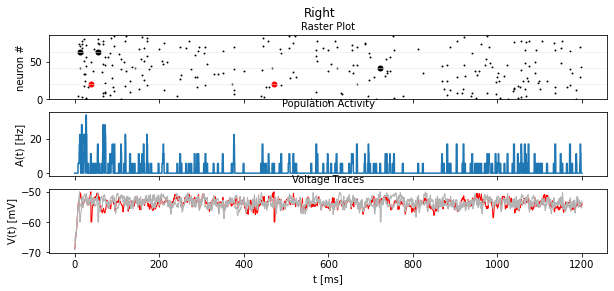

simulating 426 neurons. Start: Mon Sep 19 17:47:15 2022
sim end: Mon Sep 19 17:48:23 2022


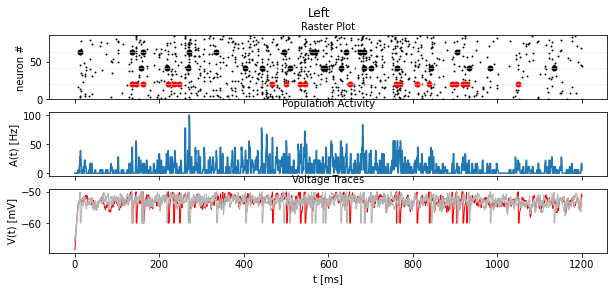

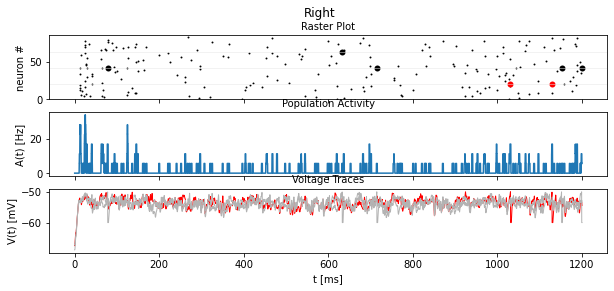

simulating 426 neurons. Start: Mon Sep 19 17:48:25 2022
sim end: Mon Sep 19 17:49:33 2022


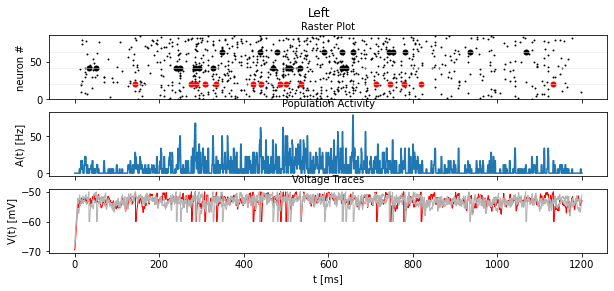

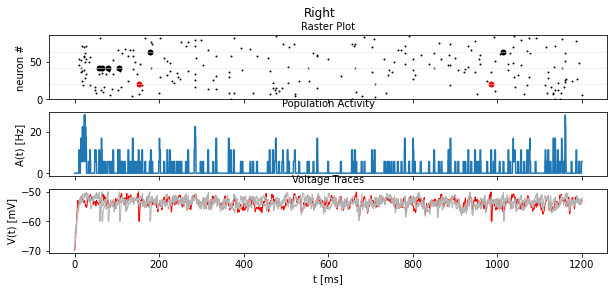

In [10]:
pop_rate_list = []


for i in range(10):

    results = network_sim(1.5, 700, 1200)
    
    pop_dict = pop_rate_to_dict(results)
    pop_rate_list.append(pop_dict)

In [11]:
curDT = datetime.now()
time = curDT.strftime("%m%d_%H_%M")

In [12]:
with open('w_pos_1p5_pop_rate_' + time + '.pkl', 'wb') as f:
    pickle.dump(pop_rate_list, f)